In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop("customerID",axis="columns",inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [6]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
df.shape

(7043, 20)

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()

11

In [9]:
df1=df[df.TotalCharges!=' ']

In [10]:
df1.shape

(7032, 20)

In [11]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [12]:
df1.loc[:, 'TotalCharges'] = pd.to_numeric(df1['TotalCharges'])

In [13]:
df1.TotalCharges.dtype

dtype('O')

In [14]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

(array([[ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.],
        [ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 BarContainer objects>)

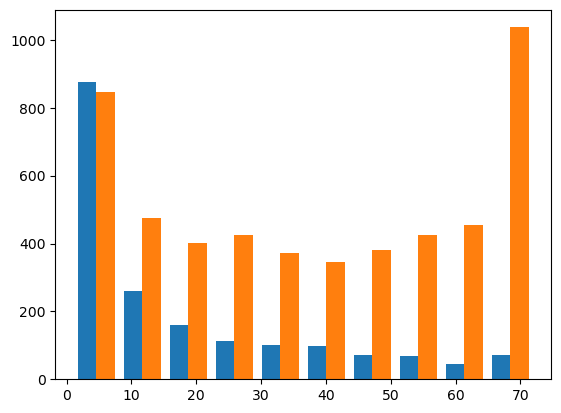

In [15]:
plt.hist([tenure_churn_yes,tenure_churn_no])

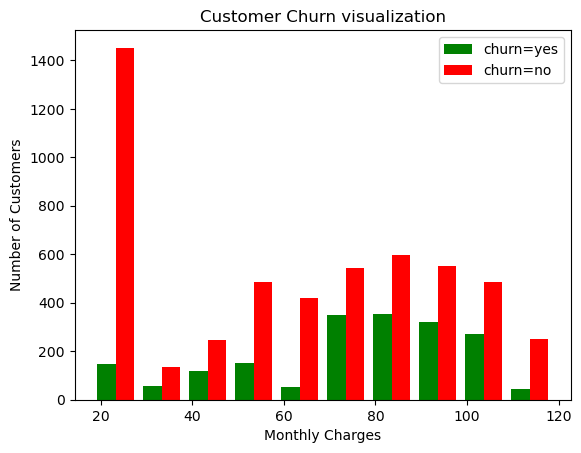

In [16]:
mc_no=df1[df1.Churn=='No'].MonthlyCharges
mc_yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title('Customer Churn visualization')
plt.hist([mc_yes,mc_no],color=['green','red'],label=['churn=yes','churn=no'])
plt.legend()

In [17]:
def print_unique_values(df):
    for col in df:
        if(df[col].dtype=='object'):
            print(f'{col}: {df[col].unique()}')

In [18]:
print_unique_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: [29.85 1889.5 108.15 ... 346.45 306.6 6844.5]
Churn: ['No' 'Yes']


In [19]:
df1 = df1.replace(['No internet service', 'No phone service'], 'No')

C:\Users\mukth\AppData\Local\Temp\ipykernel_24996\3600535700.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1 = df1.replace(['No internet service', 'No phone service'], 'No')


In [20]:
print_unique_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [21]:
yes_no_cols=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_cols:
    df1[col] = df1[col].replace({'Yes': 1, 'No': 0})

C:\Users\mukth\AppData\Local\Temp\ipykernel_24996\2682350823.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col] = df1[col].replace({'Yes': 1, 'No': 0})


In [22]:
df1['gender'] = df1['gender'].replace({'Female': 1, 'Male': 0})

C:\Users\mukth\AppData\Local\Temp\ipykernel_24996\145446845.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'] = df1['gender'].replace({'Female': 1, 'Male': 0})


In [23]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [24]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2960,0,0,0,0,22,1,1,1,0,0,...,False,True,False,True,False,False,False,False,True,False
2924,0,0,0,0,11,1,0,0,1,0,...,False,True,False,True,False,False,False,False,True,False
512,1,1,1,0,5,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
483,1,0,1,0,72,1,1,0,1,1,...,False,True,False,False,True,False,True,False,False,False
5025,0,0,1,1,6,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [25]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [26]:
for col in df2:
    if(df2[col].dtype=='bool'):
        df2[col] = df2[col].replace({True: 1, False: 0})

C:\Users\mukth\AppData\Local\Temp\ipykernel_24996\3472534618.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[col] = df2[col].replace({True: 1, False: 0})


In [27]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6015,1,0,0,0,3,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
5647,1,0,1,0,46,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
519,0,0,0,0,12,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
5699,0,0,0,0,15,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3980,0,0,0,0,28,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0


####  Scaling

In [29]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [30]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3498,0,0,0,0,0.591549,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1477,0,0,1,1,0.845070,1,1,1,1,0,...,0,1,0,0,1,0,0,0,1,0
3879,0,0,0,0,0.000000,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
7037,1,0,0,0,1.000000,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
1685,0,1,1,0,0.366197,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [31]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train.shape

(5625, 26)

In [34]:
X_test.shape

(1407, 26)

In [35]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix

def ANN(X_train,X_test,y_train,y_test,loss,weights):
    model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer='adam',
             loss=loss,
              metrics=['accuracy'])
    if(weights==-1):
        model.fit(X_train,y_train,epochs=10)
    else:
        model.fit(X_train,y_train,epochs=10,class_weight=weights)

    print("\nEvaluation :\n")
    print(model.evaluate(X_test,y_test))
    
    y_pred=model.predict(X_test)
    y_pred=np.round(y_pred)
    
    print("\nClassification report:\n",classification_report(y_test,y_pred))

    print("\nConfusion Matrix :\n", confusion_matrix(y_test,y_pred))
    return y_pred
    


In [36]:
#ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

## Under sampling

In [46]:
df2_class1 = df2[df2["Churn"] == 0]
df2_class2 = df2[df2["Churn"] == 1]
count_class1,count_class2=df2["Churn"].value_counts()

In [48]:
df2_class1.shape, df2_class2.shape

((5163, 27), (1869, 27))

In [50]:
df2_class1_under = df2_class1.sample(count_class2)

In [52]:
df2_test_under=pd.concat([df2_class1_under,df2_class2],axis=0)
df2_test_under.shape

(3738, 27)

In [54]:
df2_test_under["Churn"].value_counts()

Churn
0    1869
1    1869
Name: count, dtype: int64

In [56]:
X=df2_test_under.drop('Churn',axis='columns')
y=df2_test_under['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [58]:
y_train.value_counts(),y_test.value_counts()

(Churn
 0    1495
 1    1495
 Name: count, dtype: int64,
 Churn
 1    374
 0    374
 Name: count, dtype: int64)

In [60]:
#ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

## Over sampling

In [63]:
df2_class1 = df2[df2["Churn"] == 0]
df2_class2 = df2[df2["Churn"] == 1]
count_class1,count_class2=df2["Churn"].value_counts()
count_class1,count_class2

(5163, 1869)

In [65]:
df2_class2_over = df2_class2.sample(count_class1,replace=True)


In [67]:
df2_test_over=pd.concat([df2_class1,df2_class2_over],axis=0)
df2_test_over.shape

(10326, 27)

In [69]:
df2_test_over["Churn"].value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [71]:
X=df2_test_over.drop('Churn',axis='columns')
y=df2_test_over['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [73]:
y_train.value_counts(),y_test.value_counts()

(Churn
 0    4130
 1    4130
 Name: count, dtype: int64,
 Churn
 0    1033
 1    1033
 Name: count, dtype: int64)

In [75]:
#ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

## SMOTE

In [78]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [80]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [82]:
!pip install imblearn

In [95]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy="minority")
X_sm, y_sm=smote.fit_resample(X,y)

In [97]:
y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42,stratify=y_sm)

In [105]:
y_train.value_counts(),y_test.value_counts()

(Churn
 0    4130
 1    4130
 Name: count, dtype: int64,
 Churn
 0    1033
 1    1033
 Name: count, dtype: int64)

In [110]:
#ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

## Ensemble

In [112]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [116]:
y_train.value_counts(),y_test.value_counts()

(Churn
 0    4130
 1    1495
 Name: count, dtype: int64,
 Churn
 0    1033
 1     374
 Name: count, dtype: int64)

In [120]:
4130/3

1376.6666666666667

In [124]:
df3=X_train.copy()
df3["Churn"]=y_train

In [142]:
df3_class0=df3[df3["Churn"]==0]
df3_class1=df3[df3["Churn"]==1]

In [130]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [134]:
df_train =pd.concat( [df3_class0[:1495],df3_class1],axis=0)

In [146]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train =pd.concat([df_majority[start:end],df_minority],axis=0)
    X_train=df_train.drop('Churn',axis='columns')
    y_train=df_train['Churn']
    return X_train,y_train

In [150]:
 X_train,y_train=get_train_batch(df3_class0,df3_class1,0,1495)

y_pred1=ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

C:\Users\mukth\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6178 - loss: 0.6450
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7265 - loss: 0.5444
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7541 - loss: 0.5088
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7592 - loss: 0.4878
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7690 - loss: 0.4810
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7728 - loss: 0.4740
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7458 - loss: 0.5002
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7596 - loss: 0.4838
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7637 - loss: 0.4758
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7644 - loss: 0.4802

Evaluation :

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7135 - loss: 0.5215
[0.533754289150238, 0.7107320427894592]
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5

In [152]:
 X_train,y_train=get_train_batch(df3_class0,df3_class1,1495,2990)

y_pred2=ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

Epoch 1/10


C:\Users\mukth\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5259 - loss: 0.7074
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7378 - loss: 0.5688
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7715 - loss: 0.4988
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7758 - loss: 0.4893
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7685 - loss: 0.4921
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7704 - loss: 0.4893
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7852 - loss: 0.4647
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7827 - loss: 0.4702
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7781 - loss: 0.4675
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7844 - loss: 0.4708

Evaluation :

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7202 - loss: 0.5295
[0.5377177596092224, 0.7199715971946716]
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

C

In [154]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,2990,4130)

y_pred3=ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

C:\Users\mukth\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4589 - loss: 0.7283
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7438 - loss: 0.6011
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7719 - loss: 0.5097
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7593 - loss: 0.5044
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7882 - loss: 0.4707
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7694 - loss: 0.4838
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7765 - loss: 0.4775
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7874 - loss: 0.4670
Epoch 9/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7964 - loss: 0.4574
Epoch 10/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7795 - loss: 0.4752

Evaluation :

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6822 - loss: 0.5716
[0.5820592641830444, 0.6773276329040527]
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [158]:
len(y_pred1),len(y_pred2),len(y_pred3)

(1407, 1407, 1407)

In [172]:
y_pred_final=y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones=y_pred1[i]+y_pred2[i]+y_pred3[3]
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0
    

In [174]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.77      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.75      1407

